In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 准备数据集
dataset_X=np.array([[0.3, 0.2], [0.1, 0.4], [0.4, 0.6], [0.9, 0.5]])
dataset_y=np.array([0, 0, 0, 1])


In [3]:
# 查看数据集的分布情况
def visual_2D_dataset(dataset_X, dataset_y, title):
    '''将二维数据集dataset_X和对应的类别dataset_y显示在散点图中'''
    assert dataset_X.shape[1] == 2, 'only support dataset with 2 features'
    classes = list(set(dataset_y))
    markers = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8'
        , 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|']
    # colors=['b','c','g','k','m','w','r','y']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    for class_id in classes:
        one_class = np.array([feature for (feature, label) in
                              zip(dataset_X, dataset_y) if label == class_id])
        plt.scatter(one_class[:, 0], one_class[:, 1], marker=markers[class_id % len(markers)],
                    c=colors[class_id % len(colors)], label='cls_' + str(class_id))
    plt.title(title)
    plt.legend()

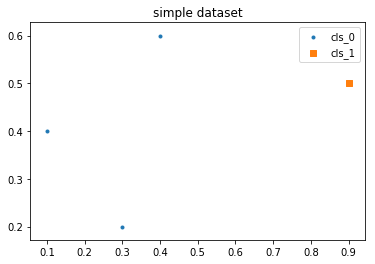

In [4]:
visual_2D_dataset(dataset_X,dataset_y,"simple dataset")

The goal of learning is reached


Text(0.5,1,'Training cost progress')

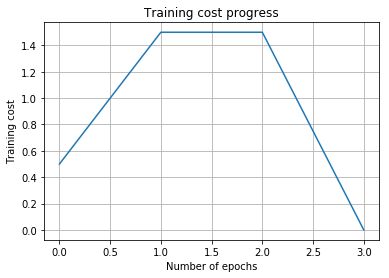

In [5]:
# 建立感知器模型
import neurolab as nl
perceptron = nl.net.newp([[dataset_X[:,0].min(),dataset_X[:,0].max()], # 指定特征1的最小和最大值
                          [dataset_X[:,1].min(),dataset_X[:,1].max()]], # 特征2的min和max
                          1) # 只有1个感知器
# 为了适合于train，需要将dataset_y处理成二维
dataset_y=dataset_y[:,np.newaxis]
cost=perceptron.train(dataset_X,dataset_y,epochs=50,show=10,lr=0.01) 
# 训练该单个感知器，50个回合，每10个回合显示一下训练结果，学习速率为0.01

# 显示下训练过程中cost的变化趋势
plt.plot(cost)
plt.xlabel('Number of epochs')
plt.ylabel('Training cost')
plt.grid()
plt.title('Training cost progress')
